In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs

In [2]:
ds = xr.tutorial.open_dataset(
    "air_temperature"
)  # use xr.tutorial.load_dataset() for xarray<v0.11.0
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
dr = ds["air"]  # get a DataArray

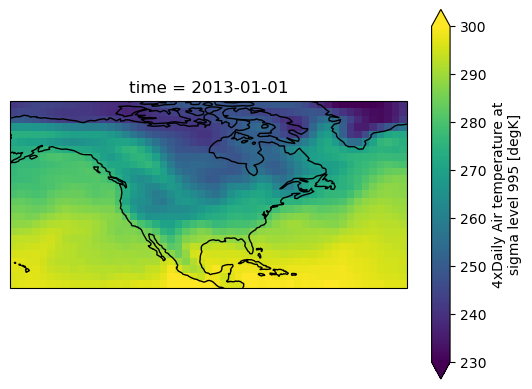

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()

In [10]:
### INPUT GRID

In [9]:
ds["lat"].values, ds["lon"].values

(array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. ,
        47.5, 45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5,
        20. , 17.5, 15. ], dtype=float32),
 array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. ,
        222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5,
        245. , 247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. ,
        267.5, 270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5,
        290. , 292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. ,
        312.5, 315. , 317.5, 320. , 322.5, 325. , 327.5, 330. ],
       dtype=float32))

In [ ]:
# Grid resolution 2.5º x 2.5º

In [ ]:
### OUTPUT GRID

In [11]:
# Say we want to downsample to 1.0º x 1.5º

In [17]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(16, 75, 0.5), {"units": "degrees_north"}),
        "lon": (["lon"], np.arange(200, 330, 0.5), {"units": "degrees_east"}),
    }
)
ds_out

<xarray.Dataset>
Dimensions:  (lat: 118, lon: 260)
Coordinates:
  * lat      (lat) float64 16.0 16.5 17.0 17.5 18.0 ... 72.5 73.0 73.5 74.0 74.5
  * lon      (lon) float64 200.0 200.5 201.0 201.5 ... 328.0 328.5 329.0 329.5
Data variables:
    *empty*

In [ ]:
### REGRIDDING

In [18]:
regridder = xe.Regridder(ds, ds_out, "conservative")
regridder  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_25x53_118x260.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (118, 260) 
Periodic in longitude?      False

In [19]:
dr_out = regridder(dr, keep_attrs=True)
dr_out

<xarray.DataArray 'air' (time: 2920, lat: 118, lon: 260)>
array([[[296.29   , 296.29   , 296.29   , ..., 296.79   , 296.6    ,
         296.6    ],
        [295.90274, 295.90228, 295.9009 , ..., 295.90207, 295.20328,
         295.2082 ],
        [295.9    , 295.9    , 295.9    , ..., 295.9    , 295.19998,
         295.19998],
        ...,
        [243.79999, 243.79999, 243.79999, ..., 235.29999, 239.29999,
         239.29999],
        [241.21855, 241.21547, 241.20619, ..., 235.49953, 238.60165,
         238.60416],
        [241.2    , 241.2    , 241.2    , ..., 235.5    , 238.59999,
         238.59999]],

       [[296.29   , 296.29   , 296.29   , ..., 296.4    , 296.6    ,
         296.6    ],
        [296.20062, 296.2005 , 296.2002 , ..., 295.5021 , 295.10352,
         295.10883],
        [296.19998, 296.19998, 296.19998, ..., 295.5    , 295.1    ,
         295.1    ],
...
        [249.89   , 249.89   , 249.89   , ..., 242.48999, 244.29   ,
         244.29   ],
        [245.81926, 245.81439, 245.79976, ..., 243.98642, 244.7888 ,
         244.78702],
        [245.79   , 245.79   , 245.79   , ..., 243.98999, 244.79   ,
         244.79   ]],

       [[297.69   , 297.69   , 297.69   , ..., 296.19   , 295.69   ,
         295.69   ],
        [296.10126, 296.0994 , 296.09375, ..., 295.69116, 295.19116,
         295.19293],
        [296.09   , 296.09   , 296.09   , ..., 295.69   , 295.19   ,
         295.19   ],
        ...,
        [249.89   , 249.89   , 249.89   , ..., 240.29   , 241.68999,
         241.68999],
        [245.12427, 245.11856, 245.10143, ..., 241.48714, 241.78975,
         241.7894 ],
        [245.09   , 245.09   , 245.09   , ..., 241.48999, 241.79   ,
         241.79   ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float64 16.0 16.5 17.0 17.5 18.0 ... 72.5 73.0 73.5 74.0 74.5
  * lon      (lon) float64 200.0 200.5 201.0 201.5 ... 328.0 328.5 329.0 329.5
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    regrid_method:  conservative

In [15]:
### CHECK RESULTS ON 2D map

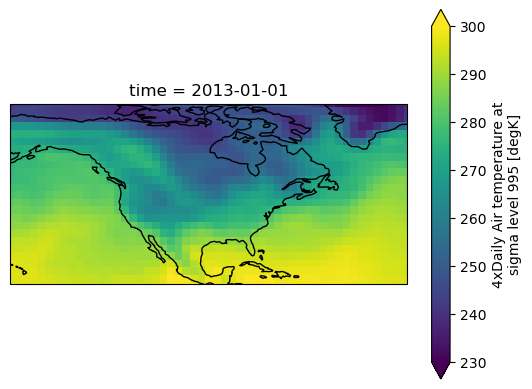

In [20]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()